In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


# ****import library 

In [2]:
pip install fuzzy_c_means 

     |████████████████████████████████| 15.7 MB 918 kB/s            
     |████████████████████████████████| 82 kB 773 kB/s             
  Attempting uninstall: click
    Found existing installation: click 8.0.3
    Uninstalling click-8.0.3:
      Successfully uninstalled click-8.0.3
  Attempting uninstall: typer
    Found existing installation: typer 0.4.0
    Uninstalling typer-0.4.0:
      Successfully uninstalled typer-0.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is

In [3]:
import numpy as np 
import pandas as pd
import matplotlib .pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# ****Read Data

In [4]:
data = pd.read_csv('../input/unsupervised-learning-on-country-data/Country-data.csv')


In [5]:
data.shape

(167, 10)

In [6]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
columns = data.columns
columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# ****Convert data from string and numbers

In [10]:
#oe=OrdinalEncoder()
##convert train_data
#for col in data:
 #   data[col]=oe.fit_transform(np.asarray(data[col].astype('str')).reshape(-1,1))

In [11]:

#print(data.shape)
#data.head()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['country'])
le.transform(data['country'])
data['country'] = le.transform(data['country'])

In [13]:
print(data.shape)
data.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# ****Data Distribution

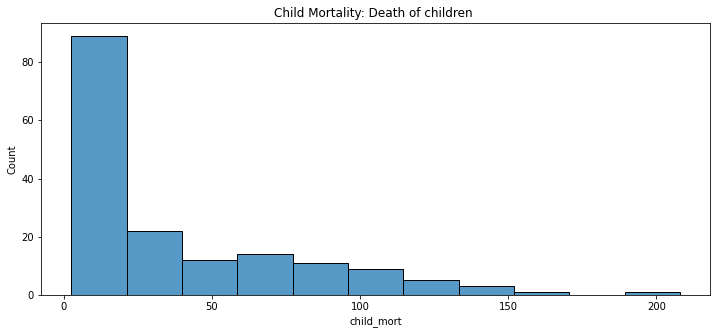

In [14]:
plt.figure(figsize=(12,5))
plt.title("Child Mortality: Death of children ")
ax = sns.histplot(data["child_mort"])

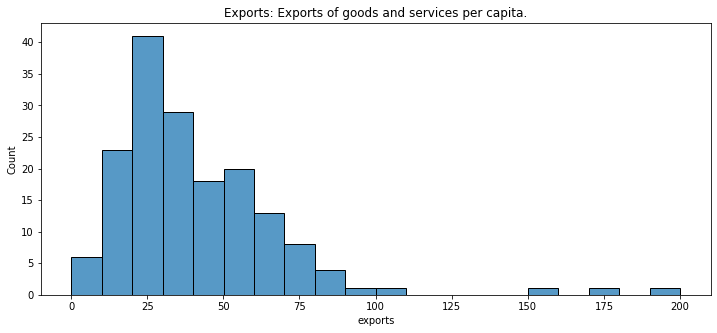

In [15]:
plt.figure(figsize=(12,5))
plt.title("Exports: Exports of goods and services per capita.")
ax = sns.histplot(data["exports"])

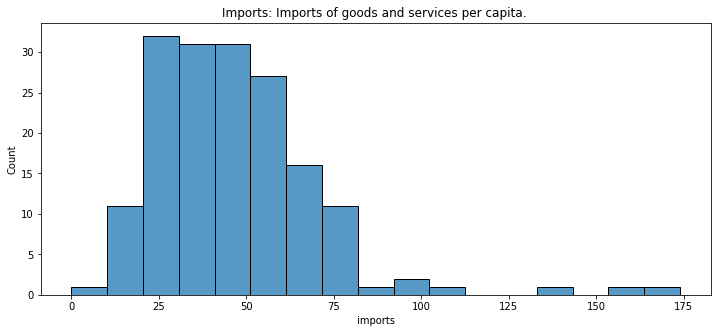

In [16]:
plt.figure(figsize=(12,5))
plt.title("Imports: Imports of goods and services per capita. ")
ax = sns.histplot(data["imports"])

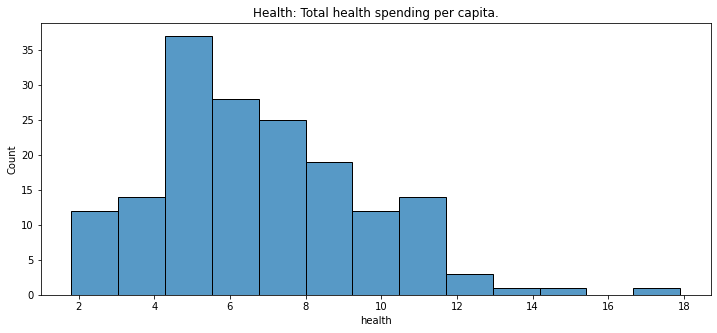

In [17]:
plt.figure(figsize=(12,5))
plt.title("Health: Total health spending per capita.")
ax = sns.histplot(data["health"])

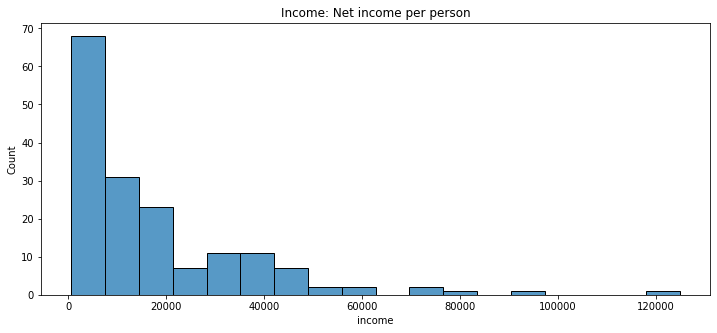

In [18]:
plt.figure(figsize=(12,5))
plt.title("Income: Net income per person")
ax = sns.histplot(data["income"])

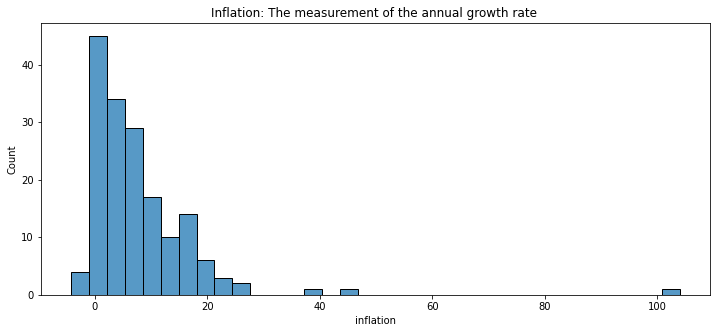

In [19]:
plt.figure(figsize=(12,5))
plt.title("Inflation: The measurement of the annual growth rate ")
ax = sns.histplot(data["inflation"])

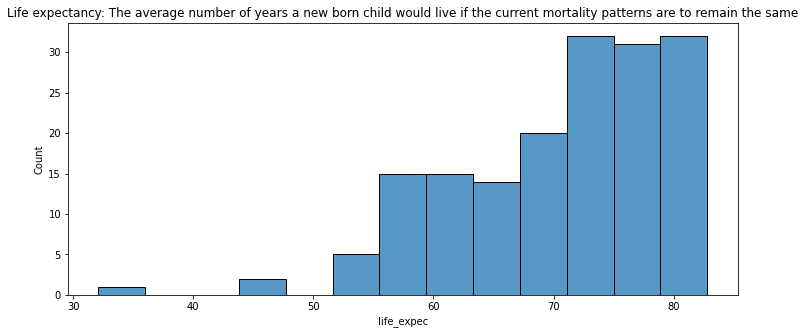

In [20]:
plt.figure(figsize=(12,5))
plt.title("Life expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same")
ax = sns.histplot(data["life_expec"])

# ****Correlation

<AxesSubplot:>

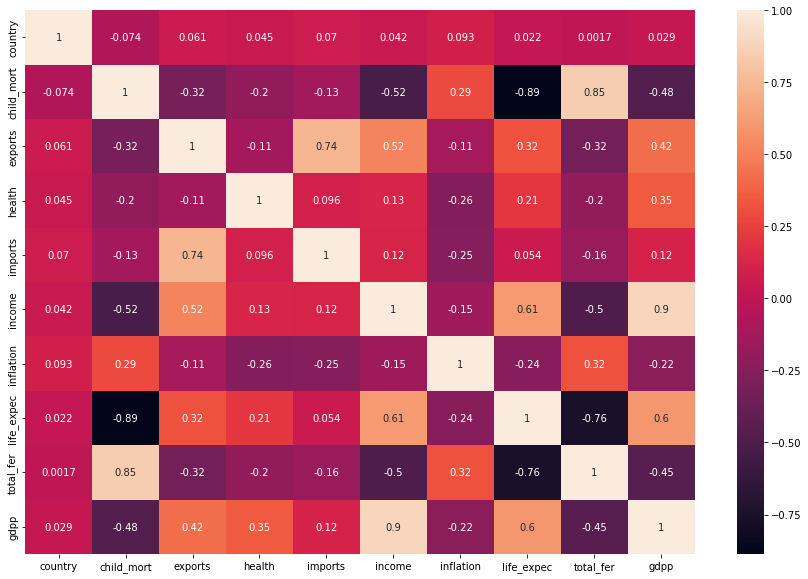

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr( ),annot=True)

# ****Scaling Data

In [22]:
scalarModel = StandardScaler()
data = scalarModel.fit_transform(data)

In [23]:
data

array([[-1.72171011,  1.29153238, -1.13827979, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-1.70096662, -0.5389489 , -0.47965843, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-1.68022312, -0.27283273, -0.09912164, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [ 1.68022312, -0.37231541,  1.13030491, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 1.70096662,  0.44841668, -0.40647827, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.72171011,  1.11495062, -0.15034774, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [24]:

data = pd.DataFrame(data , columns = columns )
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,1.638736,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,1.659480,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,1.680223,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,1.700967,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [25]:
data = data.values
data

array([[-1.72171011,  1.29153238, -1.13827979, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-1.70096662, -0.5389489 , -0.47965843, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-1.68022312, -0.27283273, -0.09912164, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [ 1.68022312, -0.37231541,  1.13030491, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 1.70096662,  0.44841668, -0.40647827, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.72171011,  1.11495062, -0.15034774, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# ****Apply Fuzzy C Means Algorithm

In [26]:
fcmModel = FCM(n_clusters = 2)
fcmModel.fit(data)
center = fcmModel.centers
center

array([[-0.03255914, -0.52501628,  0.19855278,  0.25844621,  0.08065174,
         0.37472137, -0.2299814 ,  0.54650946, -0.54720725,  0.36627318],
       [ 0.02049517,  0.62481996, -0.25615092, -0.26916076, -0.11869997,
        -0.43777814,  0.19470733, -0.6318028 ,  0.65786908, -0.40683113]])

In [27]:
#Calculating Prediction
pred = fcmModel.predict(data)
print('Predicted Value for fcmModel is : ' , pred)
pred.shape

Predicted Value for fcmModel is :  [1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1]


(167,)

In [28]:
data = pd.DataFrame(data , columns = columns )
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,1.638736,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,1.659480,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,1.680223,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,1.700967,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [29]:
# add the cluster column to the dataframe 
data['cluster'] = pred
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


# ****Draw the data and Cluster 

In [30]:
data = data.values
data

array([[-1.72171011,  1.29153238, -1.13827979, ...,  1.90288227,
        -0.67917961,  1.        ],
       [-1.70096662, -0.5389489 , -0.47965843, ..., -0.85997281,
        -0.48562324,  0.        ],
       [-1.68022312, -0.27283273, -0.09912164, ..., -0.0384044 ,
        -0.46537561,  1.        ],
       ...,
       [ 1.68022312, -0.37231541,  1.13030491, ..., -0.66120626,
        -0.63775406,  0.        ],
       [ 1.70096662,  0.44841668, -0.40647827, ...,  1.14094382,
        -0.63775406,  1.        ],
       [ 1.72171011,  1.11495062, -0.15034774, ...,  1.6246091 ,
        -0.62954556,  1.        ]])

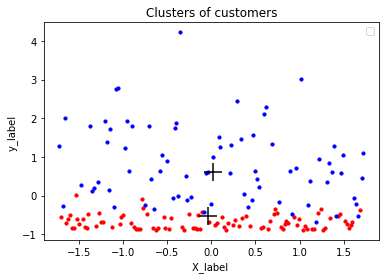

In [31]:
# Visualising the clusters
plt.scatter(data[pred == 0, 0], data[pred == 0, 1], s = 10, c = 'r')
plt.scatter(data[pred == 1, 0], data[pred == 1, 1], s = 10, c = 'b')
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Clusters of customers')
plt.xlabel('X_label ')
plt.ylabel('y_label ')
plt.legend()
plt.show()
